In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO

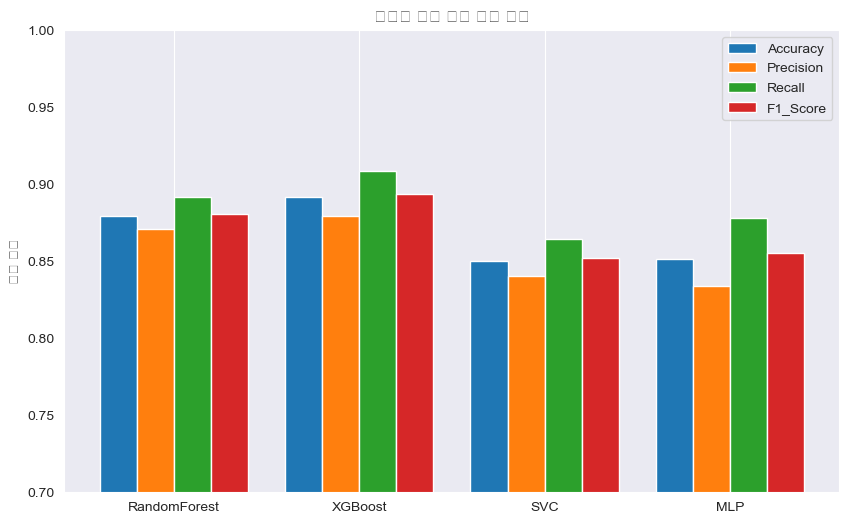

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) 

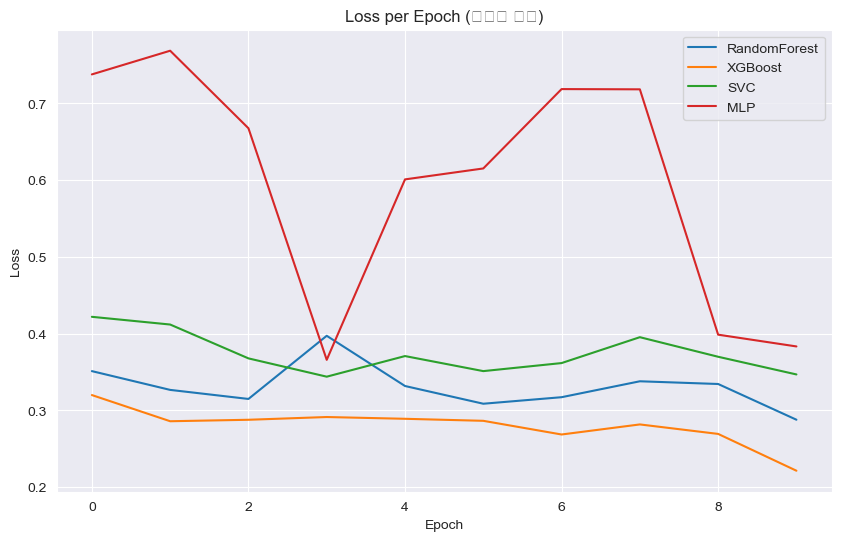

In [14]:
files = {
    "RandomForest": "data/RandomForest_metrics.csv",
    "XGBoost":      "data/XGBoost_metrics.csv",
    "SVC":          "data/SVC_metrics.csv",
    "MLP":          "data/MLP_metrics.csv",
}

metrics_avg = {}
for model, path in files.items():
    df = pd.read_csv(path)
    metrics_avg[model] = df.mean(numeric_only=True)   # 숫자 열만 평균

avg_df = pd.DataFrame(metrics_avg).T   # 행: 모델, 열: 지표

labels  = avg_df.index.tolist()
metrics = avg_df.columns.tolist()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, avg_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0.7, 1.0)
ax.set_title("모델별 평가 지표 평균 비교")
ax.set_ylabel("평균 점수")
ax.legend()
ax.grid(axis="y")

plt.show()

df_loss = pd.read_csv("data/loss_per_model.csv", index_col="epoch")

plt.figure(figsize=(10, 6))
for model in df_loss.columns:
    plt.plot(df_loss.index, df_loss[model], label=model)

plt.title("Loss per Epoch (모델별 비교)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

### RandomForest 최적 하이퍼파라미터 최빈값
| Parameter           | Value | Frequency |
|---------------------|-------|-----------|
| max_depth           | 15    | 8         |
| min_samples_leaf    | 1     | 15        |
| min_samples_split   | 2     | 15        |
| n_estimators        | 200   | 12        |

### XGBoost 최적 하이퍼파라미터 최빈값
| Parameter        | Value | Frequency |
|------------------|-------|-----------|
| colsample_bytree | 0.8   | 14        |
| learning_rate    | 0.1   | 10        |
| max_depth        | 7     | 9         |
| n_estimators     | 200   | 20        |
| subsample        | 0.8   | 15        |

### SVC 최적 하이퍼파라미터 최빈값
| Parameter    | Value | Frequency |
|--------------|-------|-----------|
| C            | 10    | 17        |
| kernel       | rbf   | 20        |
| gamma        | scale | 15        |
| shrinking    | True  | 20        |
| class_weight | None  | 13        |

### MLP 최적 하이퍼파라미터 최빈값
| Parameter          | Value  | Frequency |
|--------------------|--------|-----------|
| activation         | relu   | 12        |
| alpha              | 0.01   | 11        |
| hidden_layer_sizes | (100,) | 10        |
| solver             | adam   | 20        |
